In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [45]:
df = pd.read_csv("1000_Companies.csv")
X = df.iloc[:, :-1].values
y = df.iloc[:, 4].values
X

array([[165349.2, 136897.8, 471784.1, 'New York'],
       [162597.7, 151377.59, 443898.53, 'California'],
       [153441.51, 101145.55, 407934.54, 'Florida'],
       ...,
       [100275.47, 241926.31, 227142.82, 'California'],
       [128456.23, 321652.14, 281692.32, 'California'],
       [161181.72, 270939.86, 295442.17, 'New York']], dtype=object)

/tmp/ipykernel_5313/2411858669.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<AxesSubplot: >

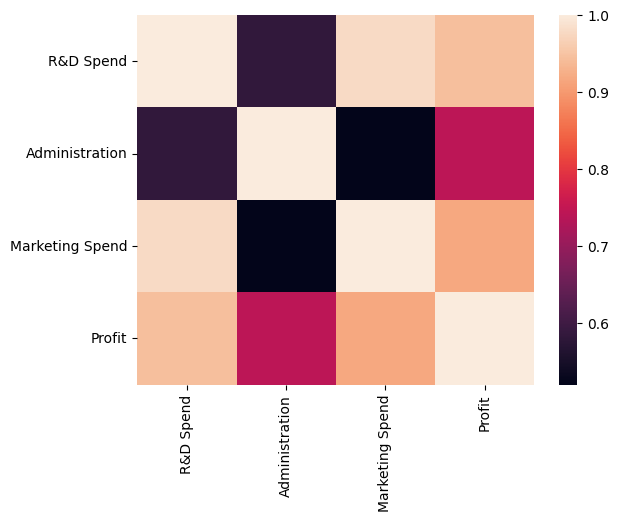

In [46]:
# data visualization, correlation between variables
sns.heatmap(df.corr())

In [47]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

labelencoder = LabelEncoder()
X[:, 3] = labelencoder.fit_transform(X[:, 3])

# Define the column transformer
ct = ColumnTransformer(
    [('one_hot_encoder', OneHotEncoder(), [3])],  # Specify the transformation for the categorical feature
    remainder='passthrough'  # Leave the remaining features unchanged
)

X = ct.fit_transform(X)


In [48]:
# avoiding dummy data
X = X[:, 1:]

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [50]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [51]:
y_pred = regressor.predict(X_test)
y_pred

array([ 89790.61532916,  88427.07187362,  94894.67836972, 175680.86725609,
        83411.73042089, 110571.90200074, 132145.22936439,  91473.37719687,
       164597.05380605,  53222.82667403,  66950.19050991, 150566.43987004,
       126915.20858596,  59337.85971051, 177513.9105306 ,  75316.28143052,
       118248.14406603, 164574.40699901, 170937.28981069, 182069.11645083,
       118845.0325269 ,  85669.95112229, 180992.59396142,  84145.08220146,
       105005.83769214, 101233.56772747,  53831.07669093,  56881.41475226,
        68896.39346906, 210040.00765881, 120778.72270894, 111724.87157655,
       101487.90541518, 137959.02649623,  63969.95996745, 108857.91214127,
       186014.72531986, 171442.64130746, 174644.26529203, 117671.49128195,
        96731.37857434, 165452.25779408, 107724.34331255,  50194.54176915,
       116513.89532179,  58632.48986822, 158416.46827608,  78541.48521611,
       159727.66671742, 131137.87699643, 184880.70924514, 174609.08266878,
        93745.66352059,  

In [52]:
regressor.coef_

array([-8.80536598e+02, -6.98169073e+02,  5.25845857e-01,  8.44390881e-01,
        1.07574255e-01])

In [53]:
regressor.intercept_

-51035.22972400923

In [54]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9112695892268818

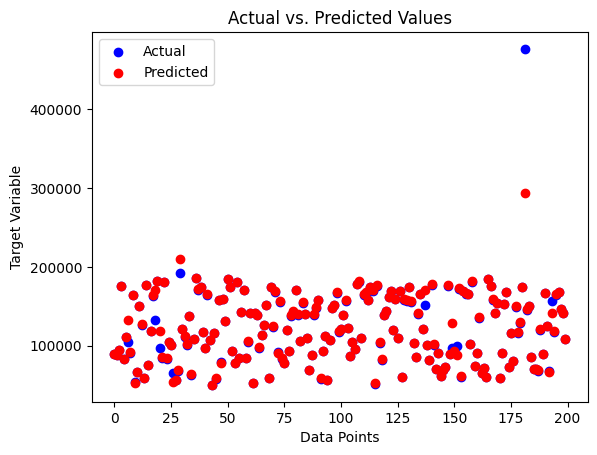

In [57]:
# Plotting the actual values
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')

# Plotting the predicted values
plt.scatter(range(len(y_test)), y_pred, color='red', label='Predicted')

plt.xlabel('Data Points')
plt.ylabel('Target Variable')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()
